In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# adat beolvasása file-ból
# space-szel elválasztott oszlopok
data = np.genfromtxt('perc3.txt')

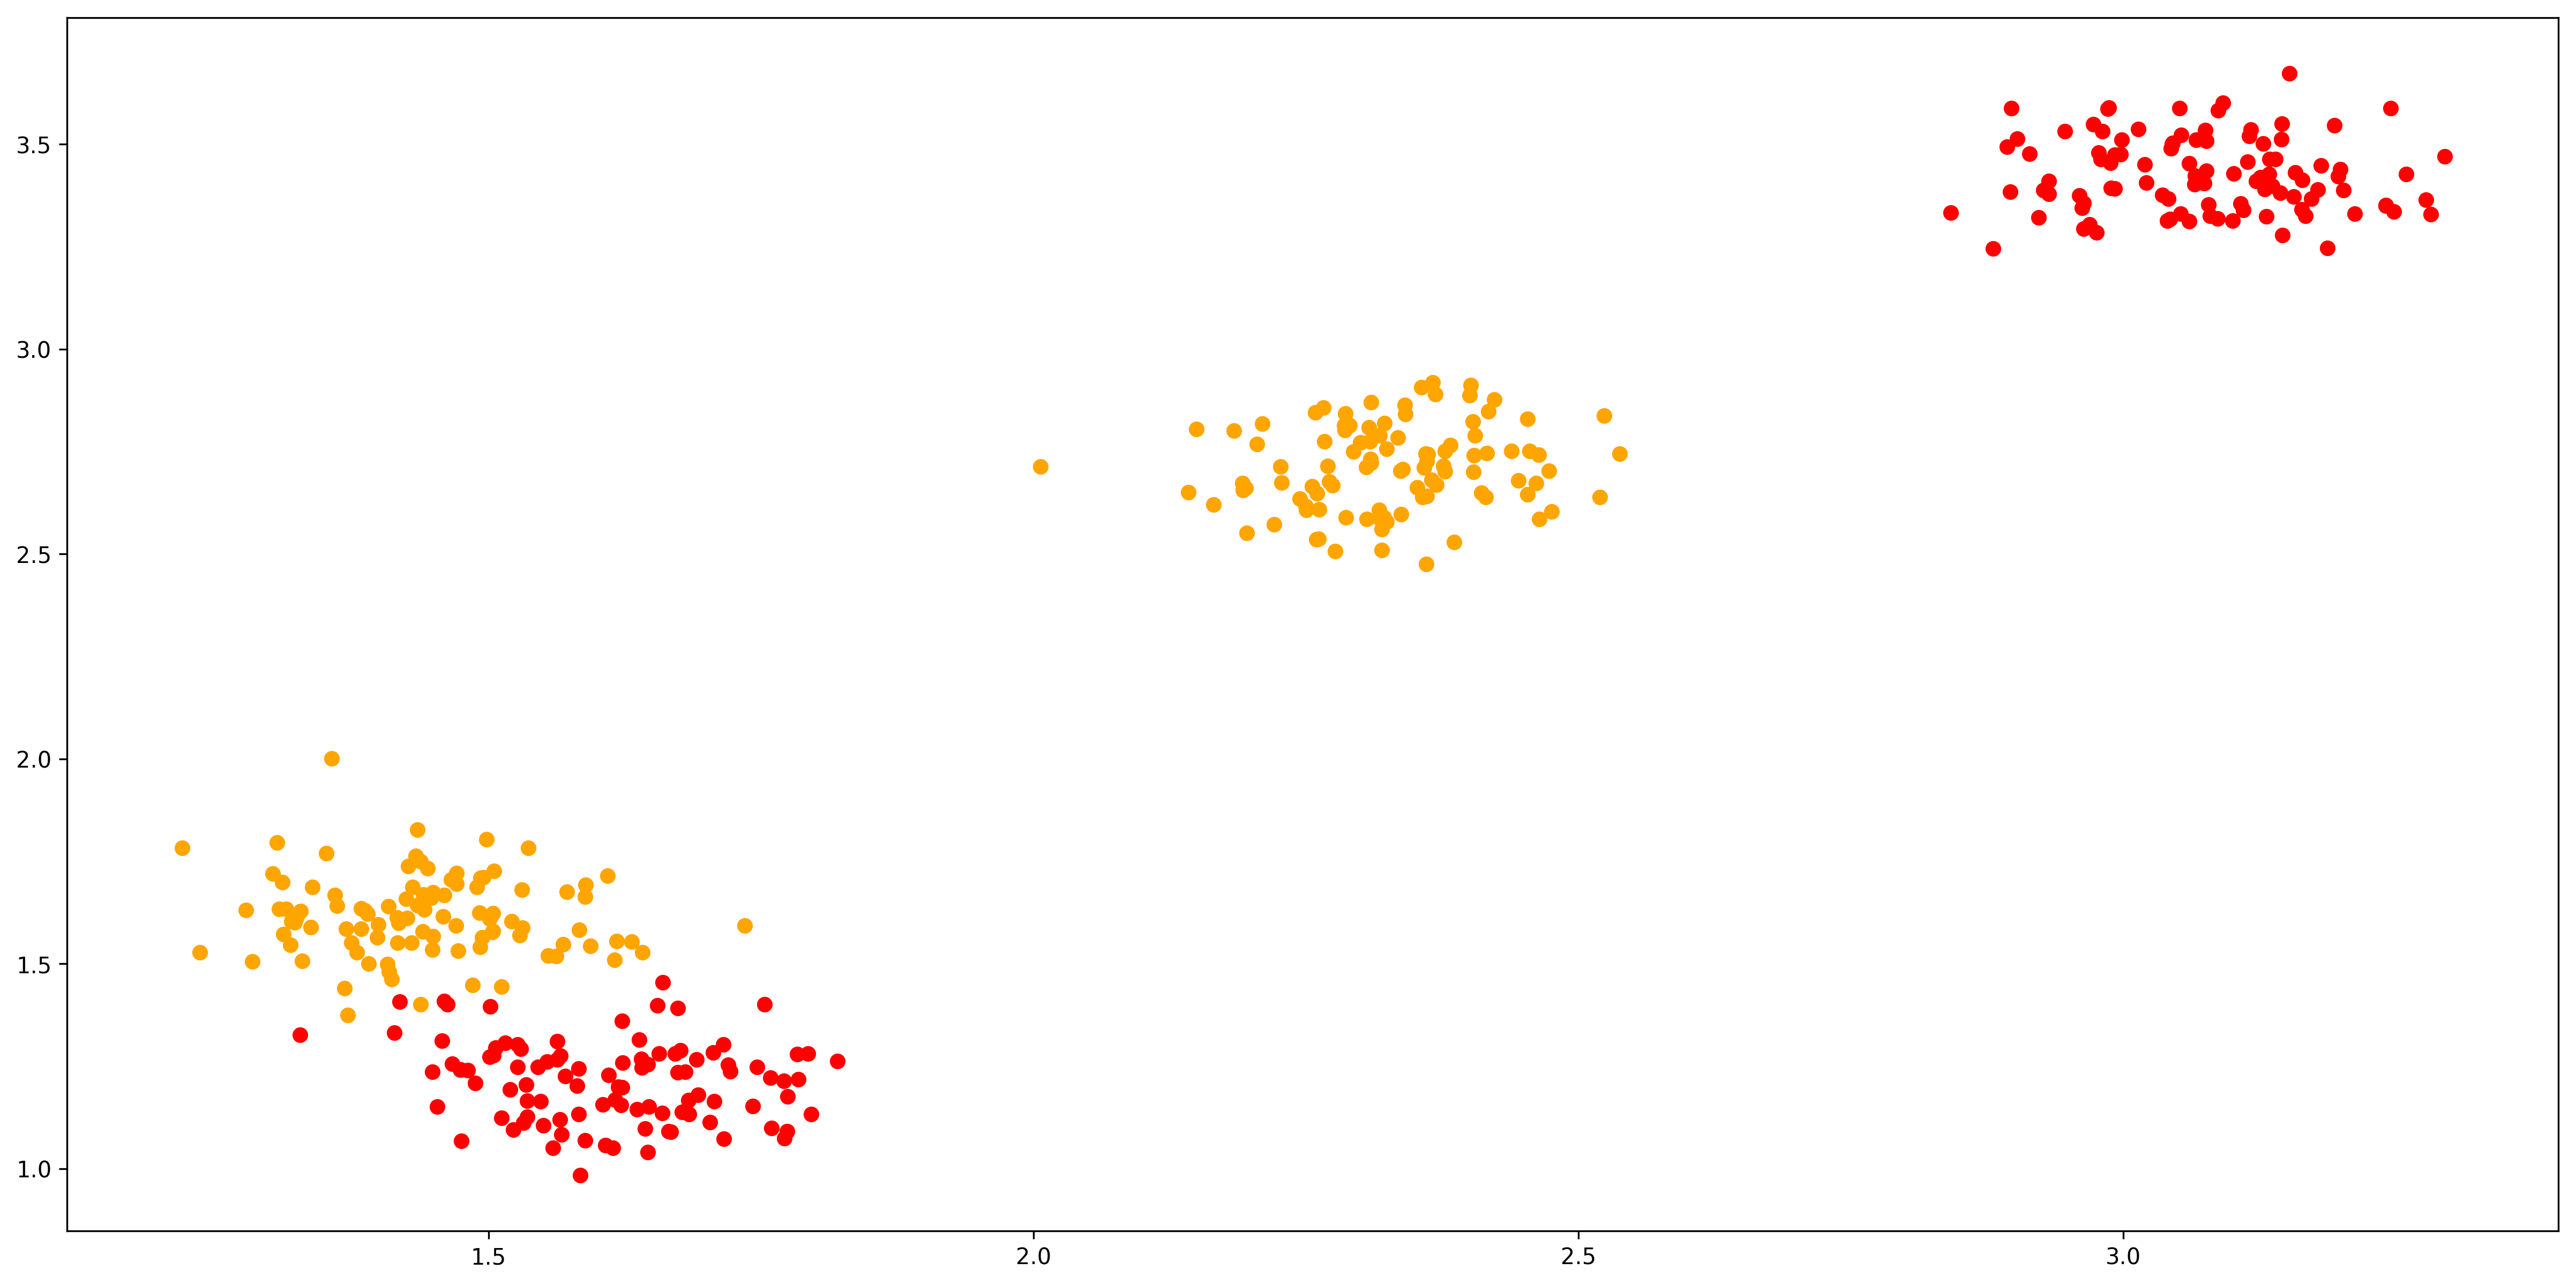

In [3]:
# plot, ábra mérete
plt.figure(figsize=(20, 10), dpi=300)
# scatterplot(x koordináta, y koordináta, color='szín')
# a tömbnél először a "data[:,0]==0"-val kiválasztjuk azokatasorokat,aminek a nulladik eleme
# nulla, azaz a nullás osztályba tartoznak, majd a [:,1] az x koordinátája, a [:,2] pedig
# az y koordinátája
plt.scatter(data[data[:,0]==0][:,1],\
           data[data[:,0]==0][:,2],color='red')
plt.scatter(data[data[:,0]==1][:,1],\
           data[data[:,0]==1][:,2],color='orange')
# kirajzoljuk a plotot, amit eddig összeraktunk
plt.show()

In [4]:
# adat elosztása tanító és teszthalmazra, a feature-ök (most koordináták) és a címkék külön változóba kerülnek
# új sklearnnél sklearn.model_selection-re nem dob figyelmeztetést
from sklearn.cross_validation import train_test_split
train_features, test_features, \
train_labels, test_labels = \
train_test_split(data[:,1:], data[:,0], \
                test_size = 0.33, random_state = 12)

C:\Users\virtual\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# sima euklideszi távolság
def distance(vect1, vect2):
    return np.linalg.norm(vect1-vect2)

In [6]:
# minden test pontra kiszámoljuk az adott pont távolságát a tanítópontokétól a dist tömbbe
# majd kiválasztjuk a legközelebbi címkéjét, azt jósoljuk
pred_labels=np.ndarray(test_labels.size)
for j in range(test_labels.size):
    dist=np.ndarray(train_labels.size)
    for i in range(train_labels.size):
        dist[i]=distance(test_features[j], \
                         train_features[i])
    pred_labels[j]=train_labels[np.argmin(dist)]

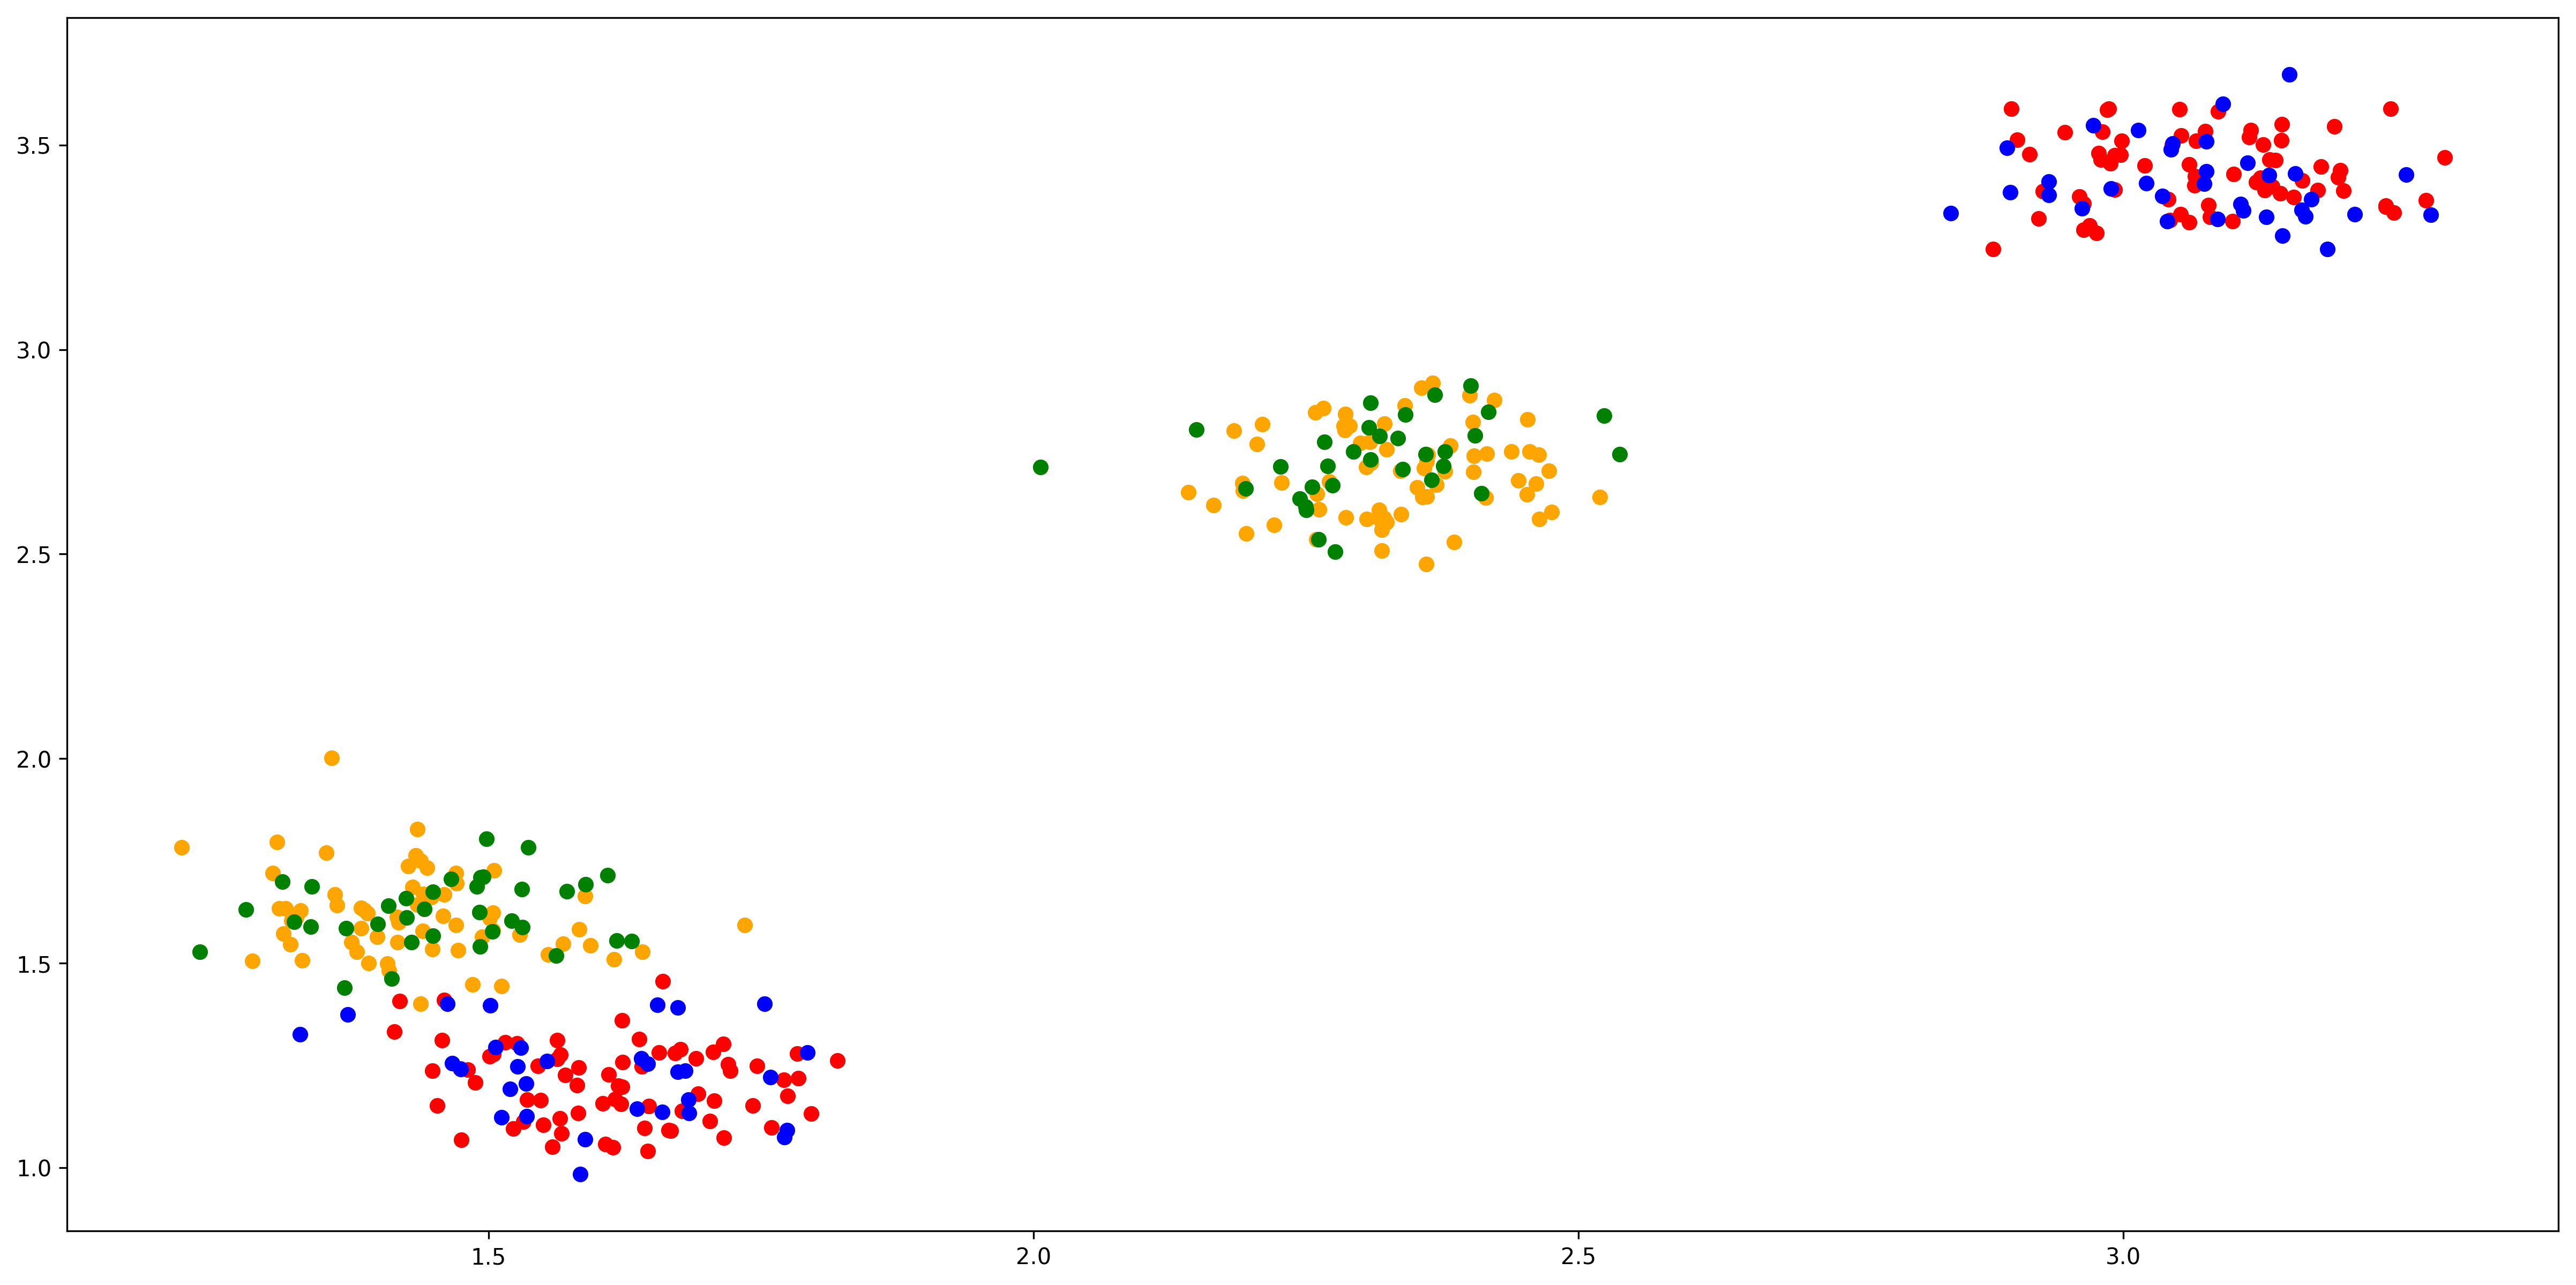

In [7]:
# piros: tanító, 0-ás osztály
# narancs: tanító, 1-es osztály
# kék: jósolt 0-ás osztály
# zöld: jósolt 1-es osztály
plt.figure(figsize=(20, 10), dpi=300)
plt.scatter(train_features[train_labels==0][:,0],\
           train_features[train_labels==0][:,1],\
           color='red')
plt.scatter(train_features[train_labels==1][:,0],\
           train_features[train_labels==1][:,1],\
           color='orange')
plt.scatter(test_features[pred_labels==0][:,0],\
           test_features[pred_labels==0][:,1],\
           color='blue')
plt.scatter(test_features[pred_labels==1][:,0],\
           test_features[pred_labels==1][:,1],\
           color='green')
plt.show()

In [8]:
# rosszul jósolt elemek összeszámolása
mispredict=0
for i in range(test_labels.size):
    if test_labels[i] != pred_labels[i]:
        mispredict += 1
print(mispredict)

1


In [9]:
# adat beolvasása a klaszterezéshez
data = np.genfromtxt('kmeans_data2.txt')

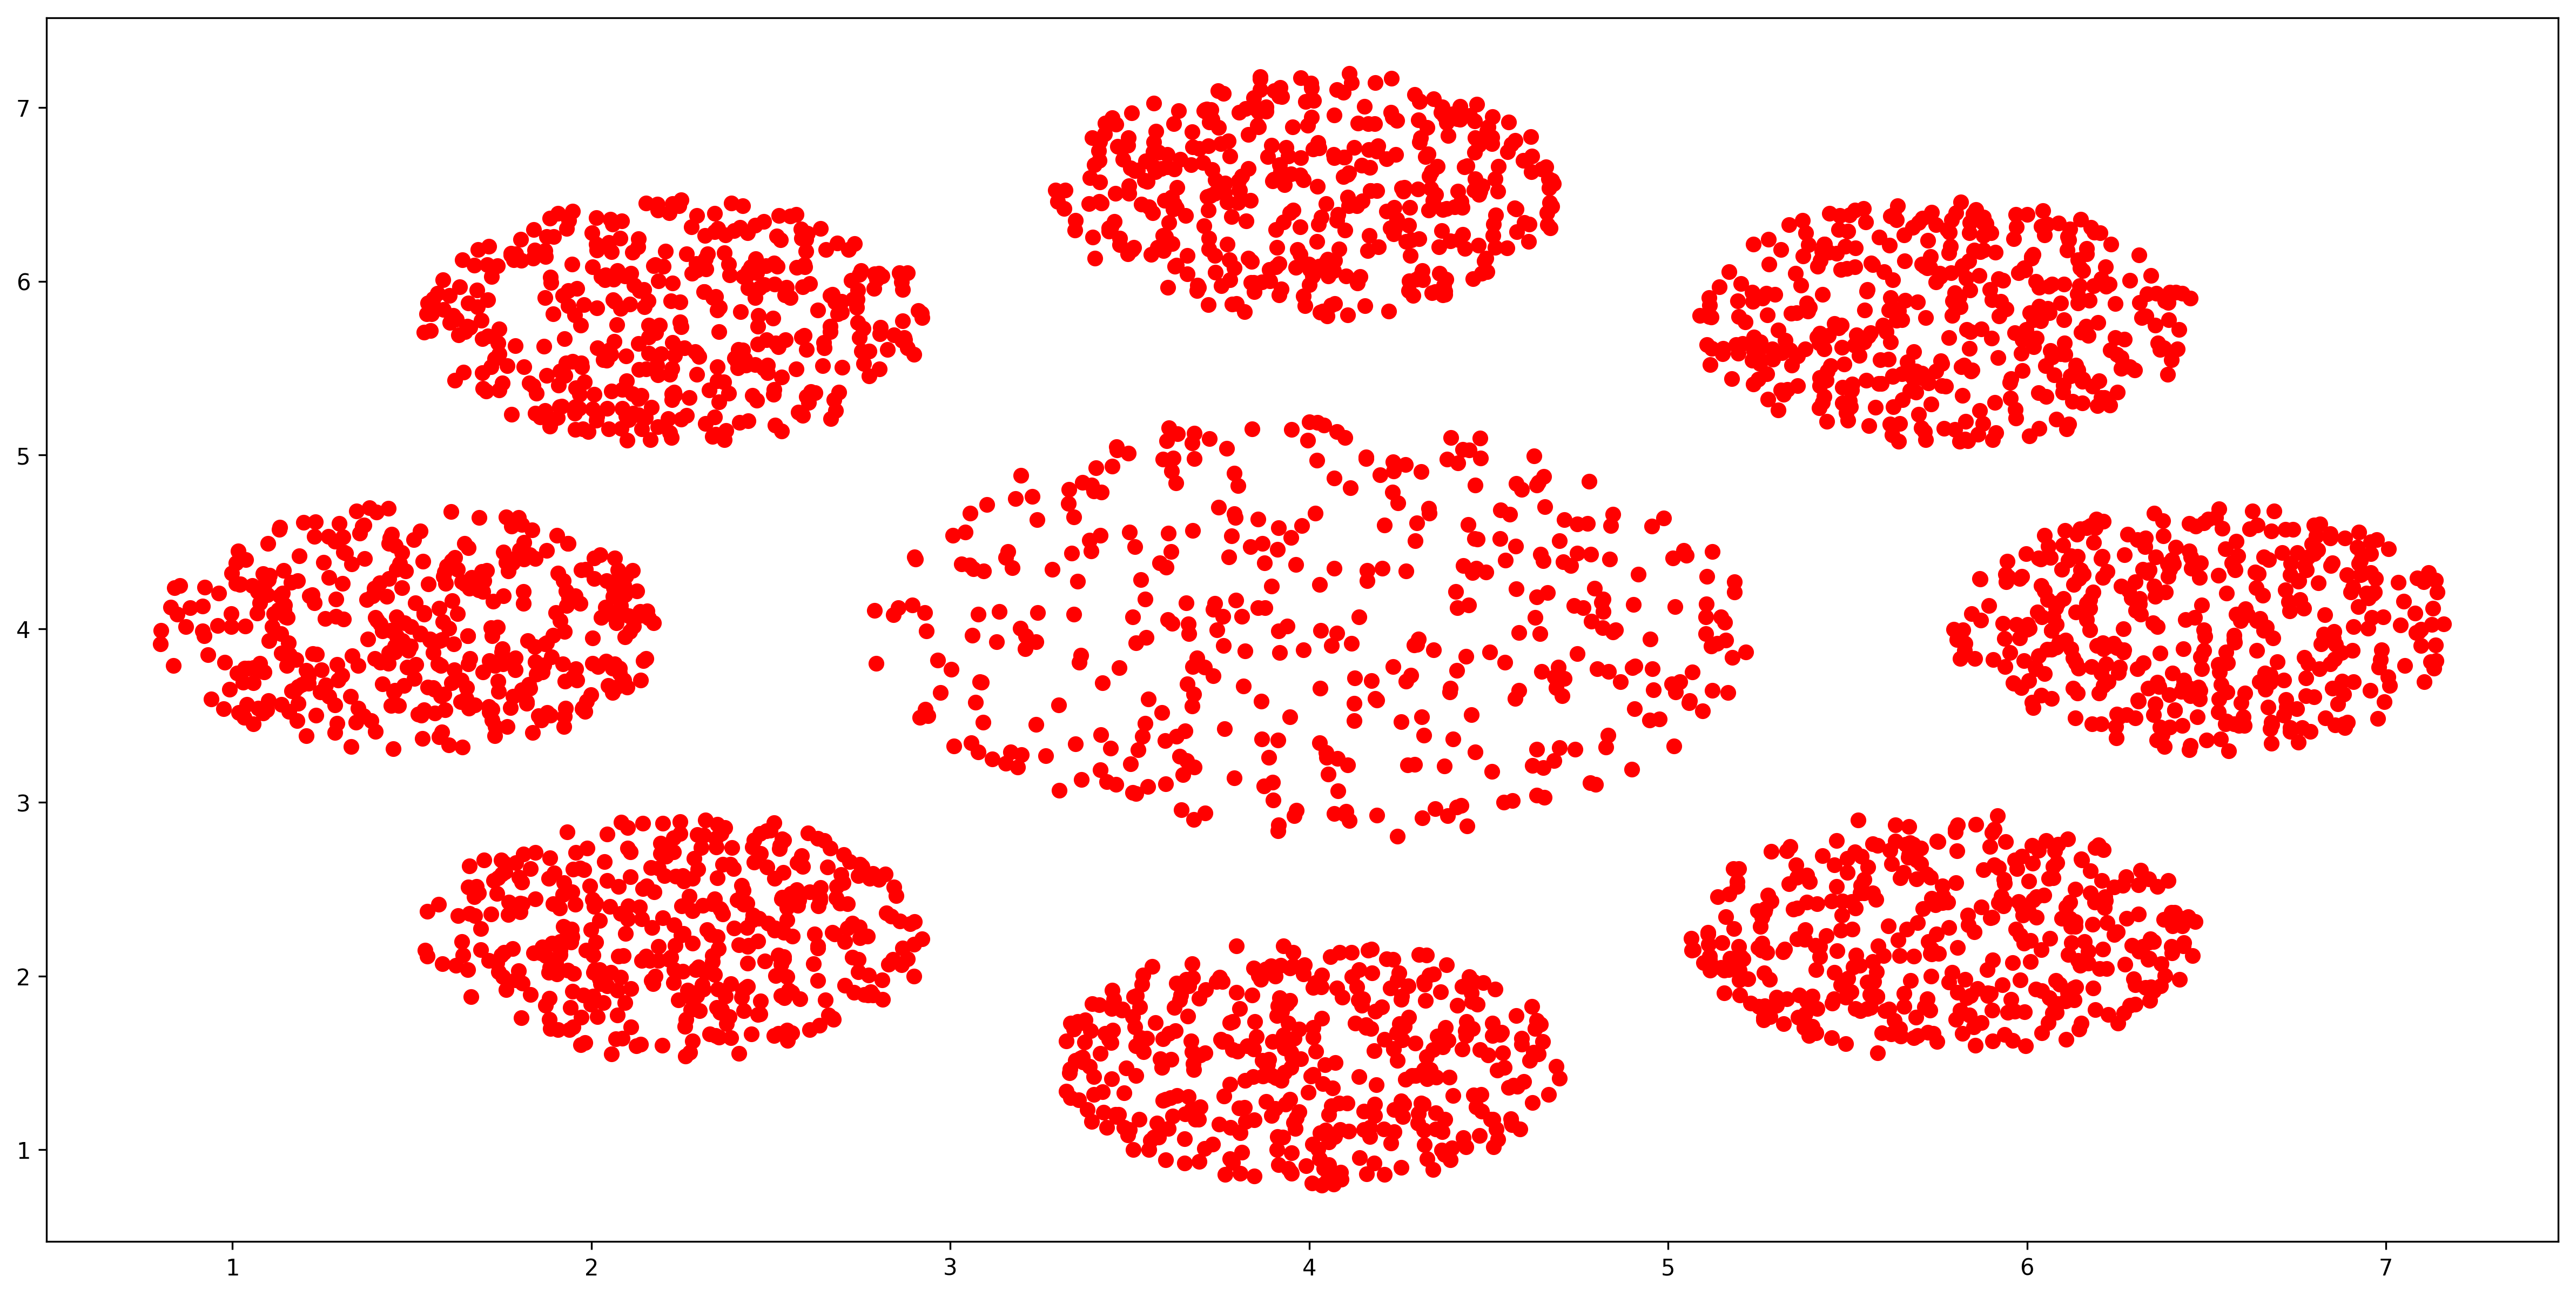

In [10]:
plt.figure(figsize=(20, 10), dpi=300)
plt.scatter(data[:,0], data[:,1], color='red')
plt.show()

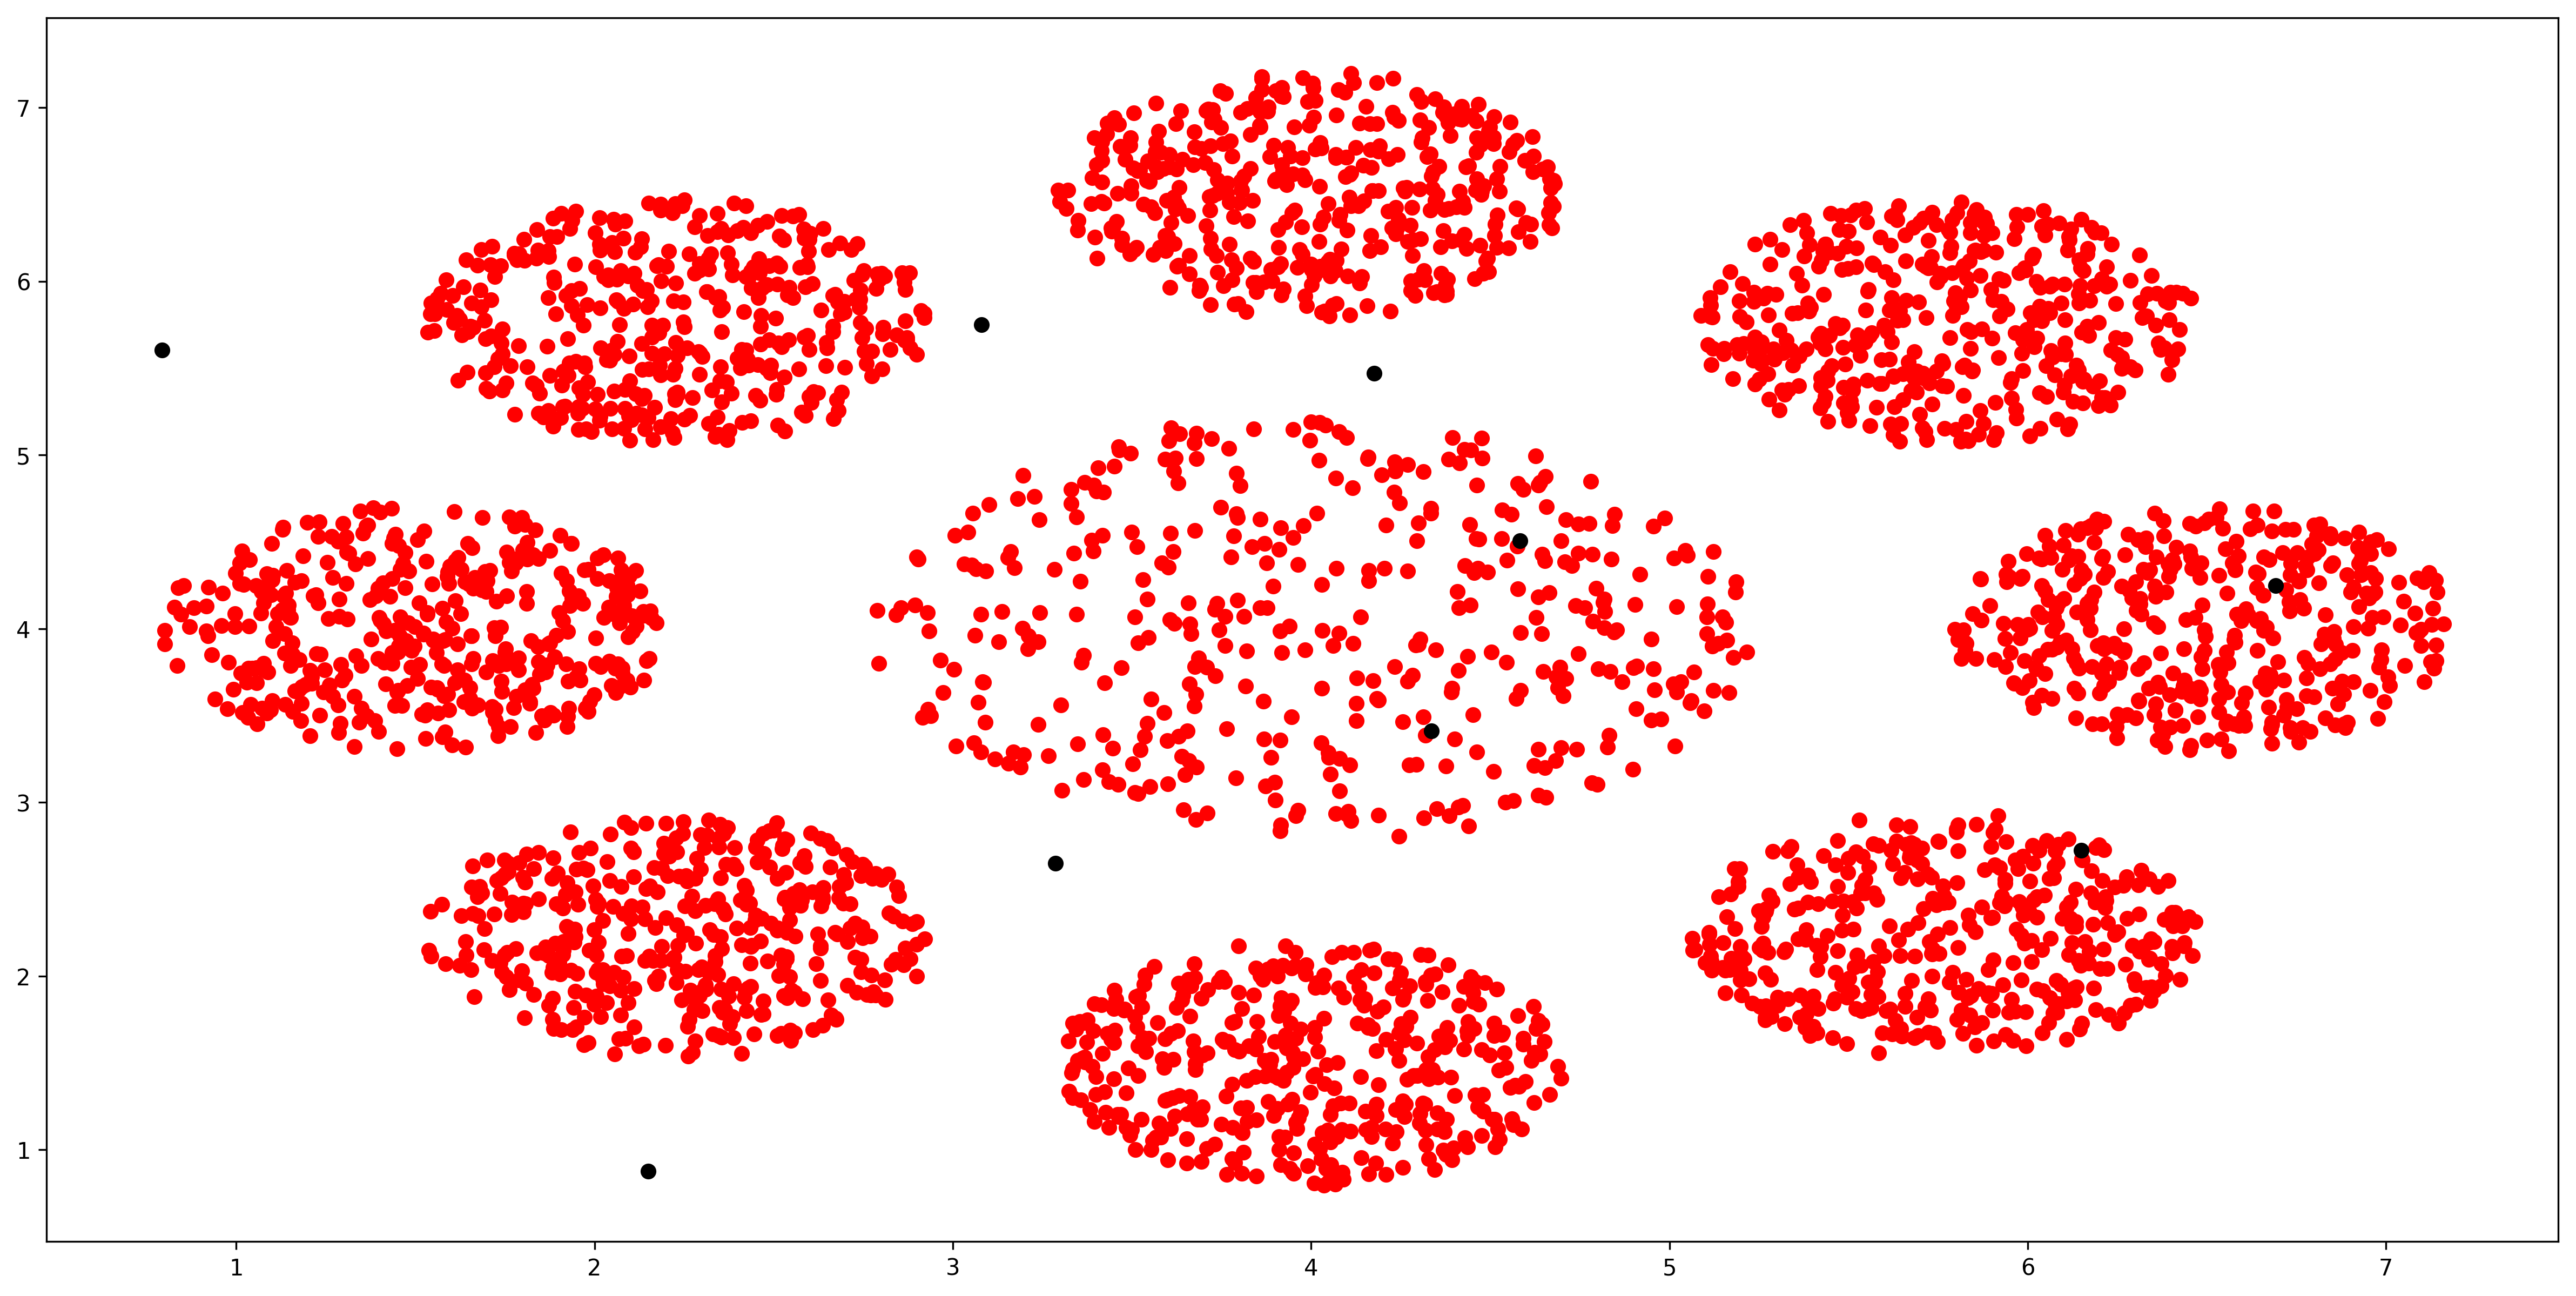

[ 195.  780.  152.  490.  501.  356.  185.  427.  514.]
[ 307.  457.  223.  568.  475.  455.  156.  449.  510.]
[ 400.  393.  236.  624.  492.  401.  166.  407.  481.]
[ 400.  400.  223.  656.  478.  400.  176.  400.  467.]
[ 400.  400.  204.  667.  475.  400.  196.  400.  458.]
[ 400.  400.  196.  668.  476.  400.  204.  400.  456.]
[ 400.  400.  193.  667.  479.  400.  207.  400.  454.]
[ 400.  400.  191.  666.  482.  400.  209.  400.  452.]
[ 400.  400.  191.  667.  483.  400.  209.  400.  450.]
[ 400.  400.  190.  668.  483.  400.  210.  400.  449.]
[ 400.  400.  190.  669.  483.  400.  210.  400.  448.]
[ 400.  400.  190.  670.  483.  400.  210.  400.  447.]
[ 400.  400.  190.  672.  483.  400.  210.  400.  445.]
[ 400.  400.  190.  673.  483.  400.  210.  400.  444.]
[ 400.  400.  190.  672.  484.  400.  210.  400.  444.]
[ 400.  400.  190.  671.  485.  400.  210.  400.  444.]
[ 400.  400.  190.  671.  485.  400.  210.  400.  444.]


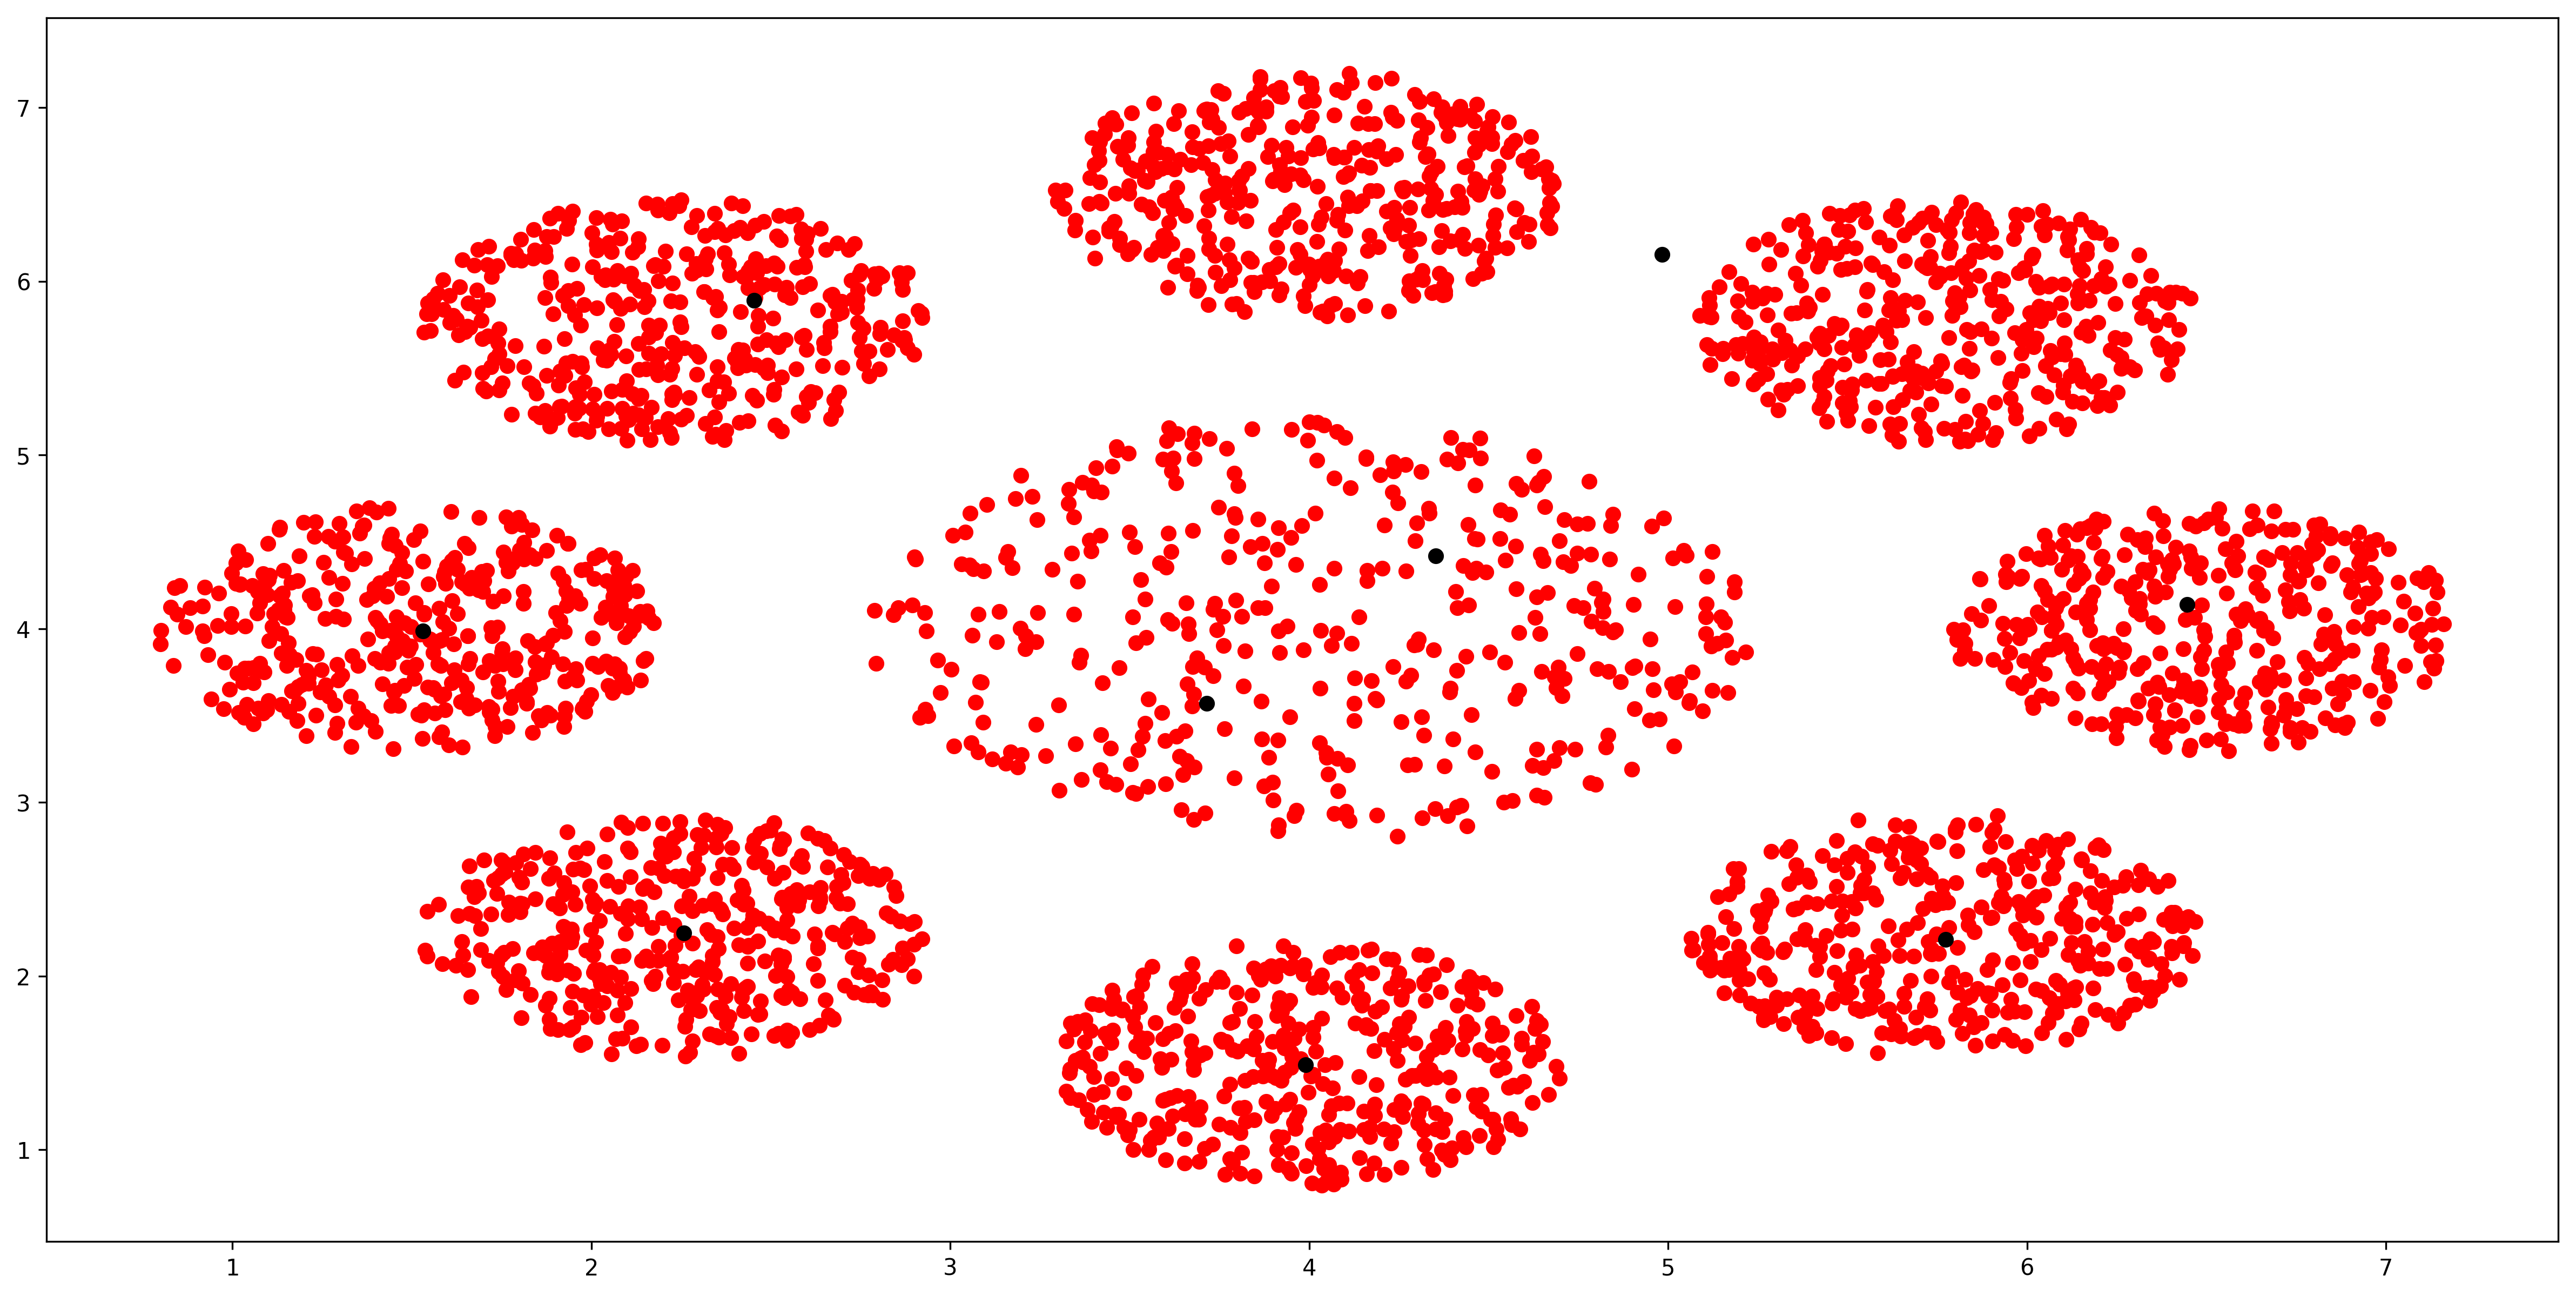

In [11]:
# klasztezezés
# a klaszterközéppontok véletlenszerűek
clusters=np.random.rand(9, 2)*7
plt.figure(figsize=(20, 10), dpi=300)
plt.scatter(data[:,0], data[:,1], color='red')
plt.scatter(clusters[:,0], clusters[:,1],\
            color='black')
plt.show()
pred_clust=np.ndarray(data[:,0].size)
num_element=np.ndarray(clusters[:,0].size)
# minden iterációban a következő történik:
# minden elemre megkeressük a legközelebbi klaszter középpontot, és abba a klaszterbe soroljuk
# majd minden klaszterre kiszámoljuk a bele tartozó pontok átlagát, az lesz az új középpont
# az üres klaszterek új, véletlenszerű középpontot kapnak
for iter in range(50):
    prev_num=num_element
    num_element=np.zeros(clusters[:,0].size)
    for j in range(data[:,0].size):
        dist=np.ndarray(clusters[:,0].size)
        for i in range(clusters[:,0].size):
            dist[i]=distance(data[j,:], \
                            clusters[i,:])
        pred_clust[j]=np.argmin(dist)
        num_element[np.argmin(dist)]+=1
    print(num_element)
    if(np.array_equal(num_element, prev_num)):
        break
    for i in range(clusters[:,0].size):
        clusters[i,:]=np.array(\
            [np.sum(data[pred_clust==i][:,0]),\
             np.sum(data[pred_clust==i][:,1])])
        if(num_element[i] != 0):
            clusters[i,:]/=num_element[i]
        else:
            clusters[i,:]=np.random.rand(2)*7
plt.figure(figsize=(20, 10), dpi=300)
plt.scatter(data[:,0], data[:,1], color='red')
plt.scatter(clusters[:,0], clusters[:,1],\
            color='black')
plt.show()


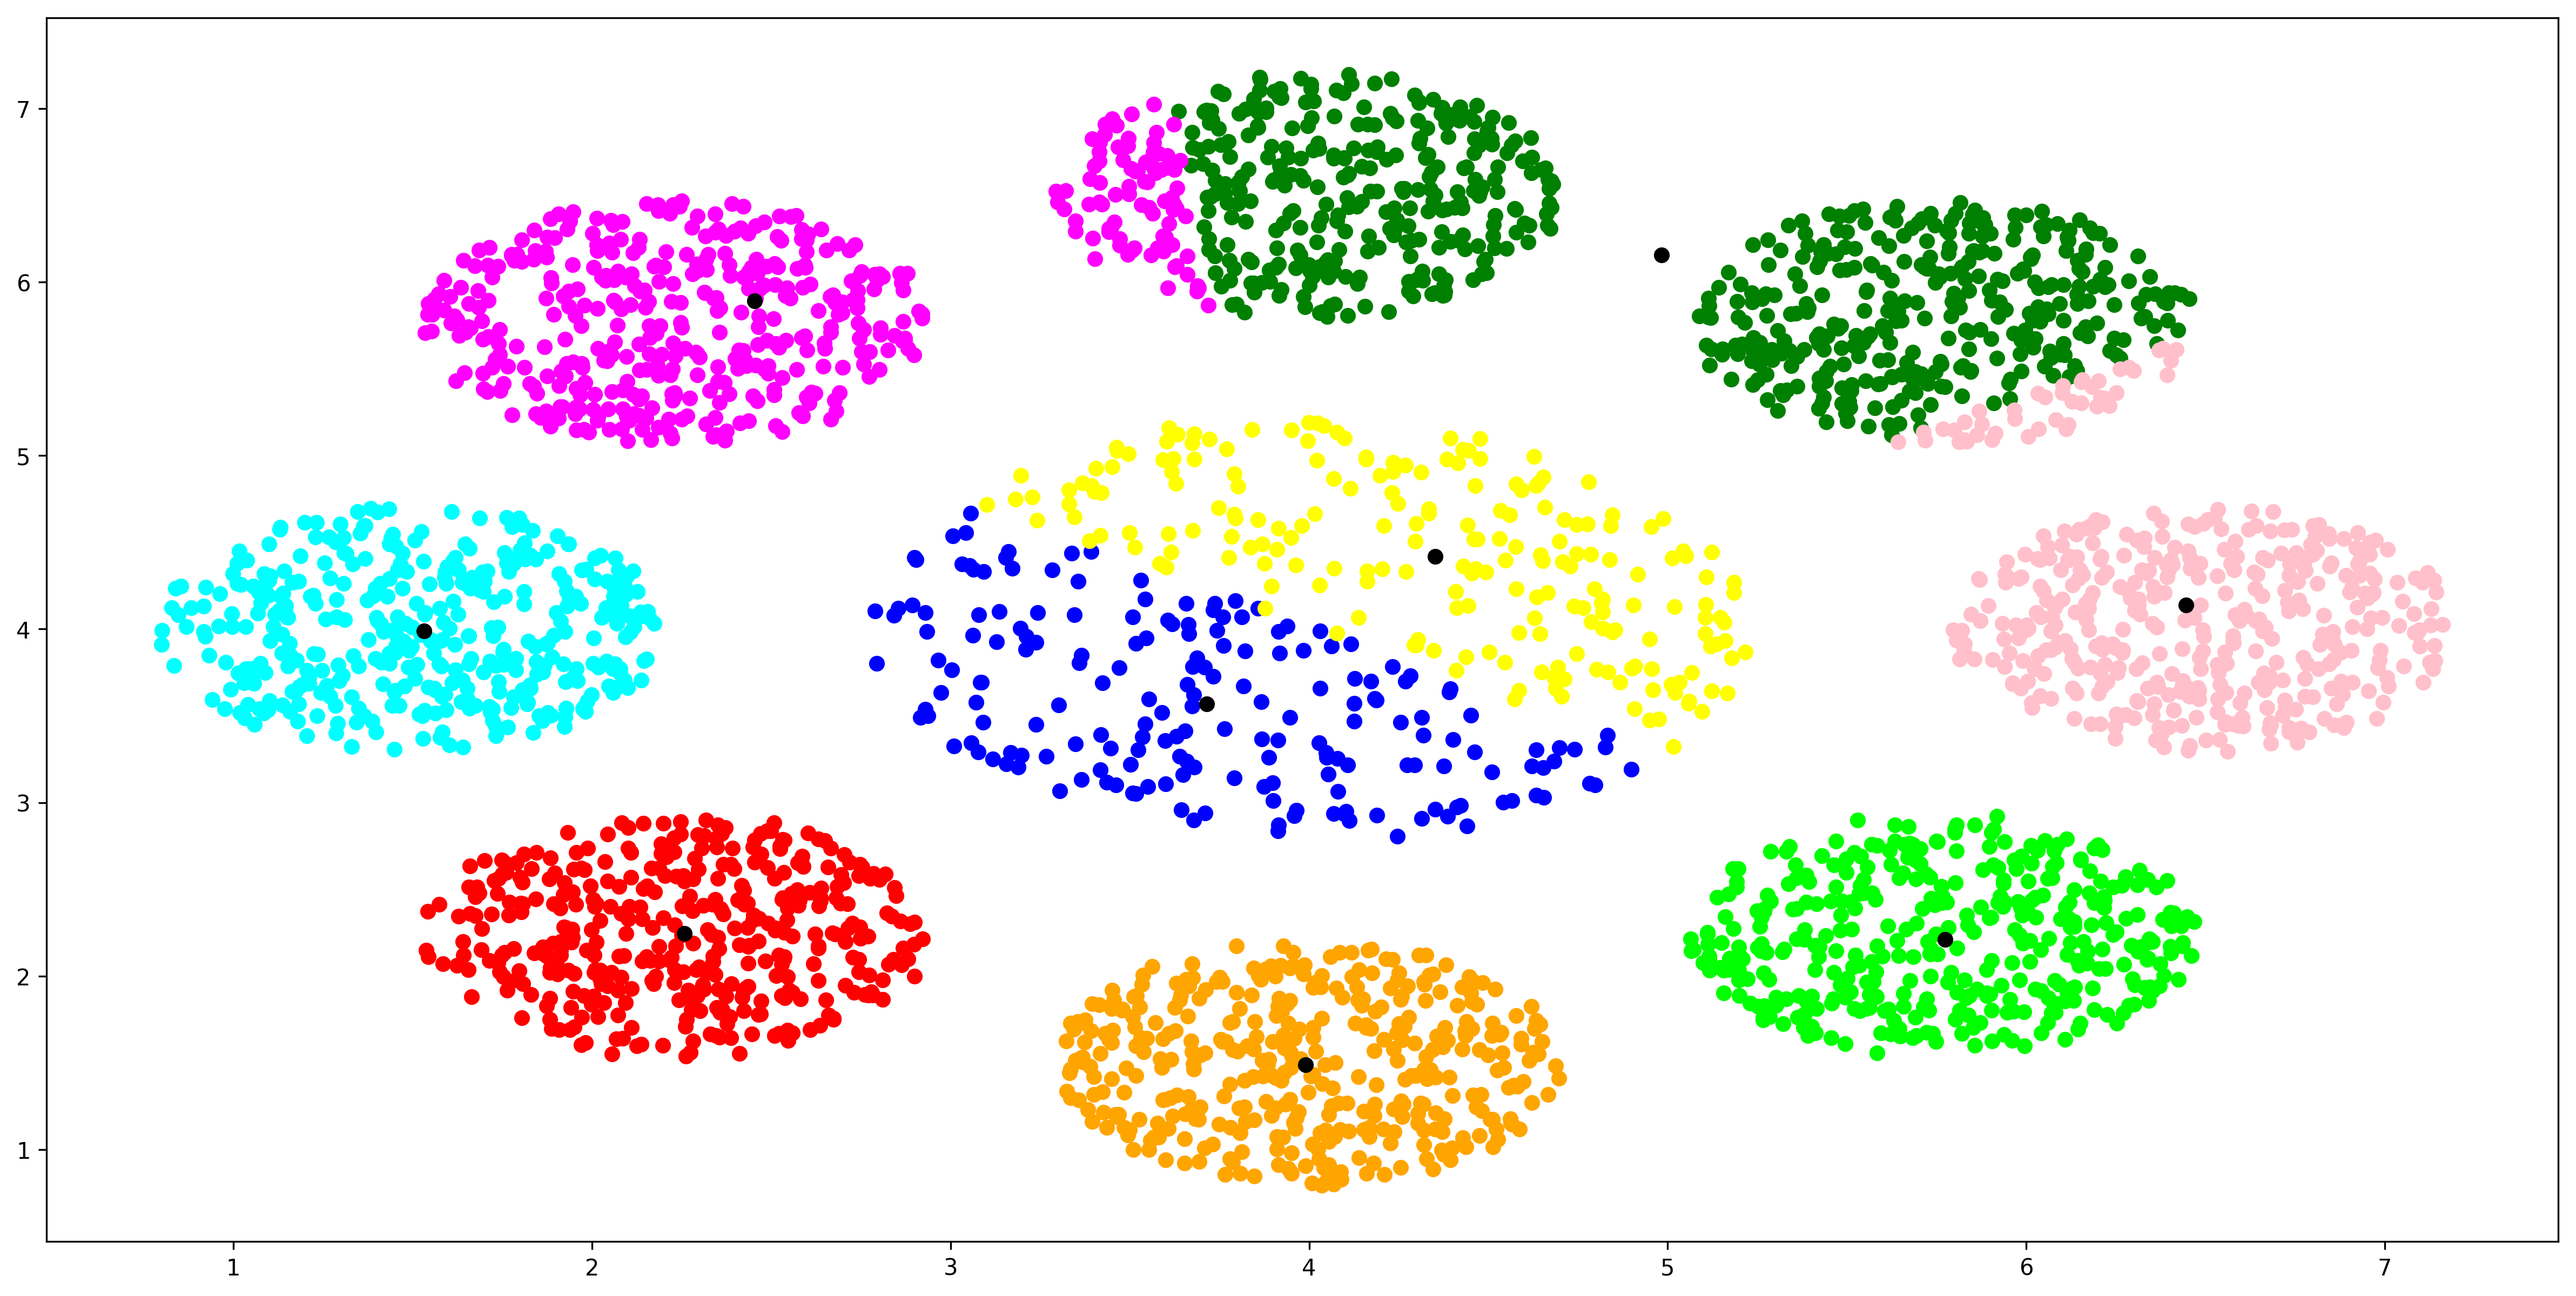

In [12]:
plt.figure(figsize=(20, 10), dpi=300)
plt.scatter(data[pred_clust==0][:,0],\
           data[pred_clust==0][:,1],color='red')
plt.scatter(data[pred_clust==1][:,0],\
           data[pred_clust==1][:,1],color='orange')
plt.scatter(data[pred_clust==2][:,0],\
           data[pred_clust==2][:,1],color='blue')
plt.scatter(data[pred_clust==3][:,0],\
           data[pred_clust==3][:,1],color='green')
plt.scatter(data[pred_clust==4][:,0],\
           data[pred_clust==4][:,1],color='magenta')
plt.scatter(data[pred_clust==5][:,0],\
           data[pred_clust==5][:,1],color='cyan')
plt.scatter(data[pred_clust==6][:,0],\
           data[pred_clust==6][:,1],color='yellow')
plt.scatter(data[pred_clust==7][:,0],\
           data[pred_clust==7][:,1],color='lime')
plt.scatter(data[pred_clust==8][:,0],\
           data[pred_clust==8][:,1],color='pink')
plt.scatter(clusters[:,0], clusters[:,1],\
            color='black')
plt.show()